In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path
from pathlib import Path
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [2]:
# папки
path = list(Path("./HandPD/Spiral_HandPD").glob(r"*/*.jpg"))
# метки
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], path))
# датафрейм
data = pd.concat([pd.Series(path, name="JPG").astype(str), pd.Series(labels, name="CATEGORY")], axis=1)
# перемешивание
data = data.sample(frac=1).reset_index(drop=True)

### Изображения тренировочного набора

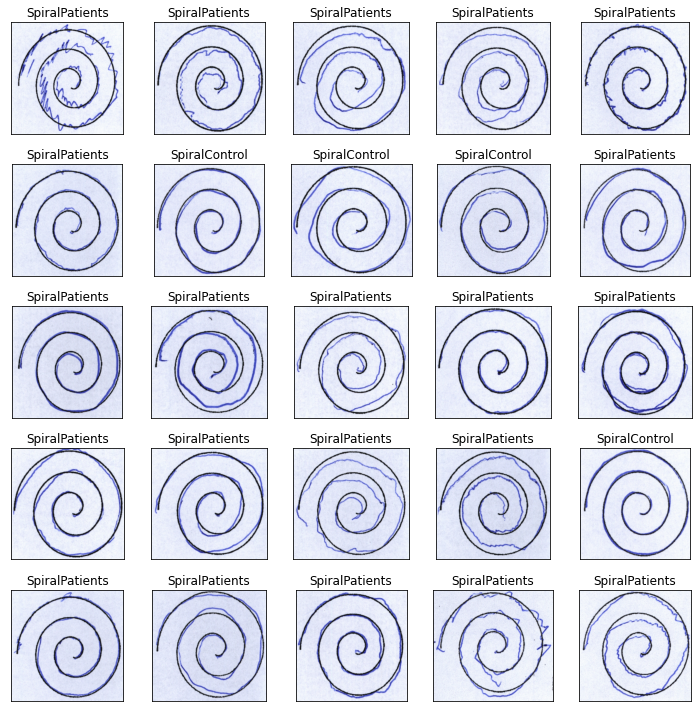

In [3]:
# общая картинка
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data["JPG"][i]))
    ax.set_title(data["CATEGORY"][i])
plt.tight_layout()
plt.show()

### Тренировка и тестирование на датасете

In [4]:
# трансформация
path = []
for i in range(0, 368):
    path.append(np.array(cv2.imread(data["JPG"][i])).astype("float32").mean()/255)

train = pd.concat([pd.Series(path, name="JPG"), pd.Series(LabelEncoder().fit_transform(data["CATEGORY"]), name="CATEGORY")], axis=1)

# тренировка и тестирование
xTrain, xTest, yTrain, yTest = train_test_split(train[["JPG"]], train["CATEGORY"], test_size=0.3)
models = [LogisticRegression(solver="liblinear").fit(xTrain, yTrain),
           GaussianNB().fit(xTrain, yTrain),
           KNeighborsClassifier().fit(xTrain, yTrain),
           DecisionTreeClassifier().fit(xTrain, yTrain),
           RandomForestClassifier(verbose=False).fit(xTrain, yTrain),
           GradientBoostingClassifier(verbose=False).fit(xTrain, yTrain),
           XGBClassifier().fit(xTrain, yTrain),
           LGBMClassifier().fit(xTrain, yTrain),
           CatBoostClassifier(verbose=False).fit(xTrain, yTrain)]
table_acc = pd.DataFrame(columns=['model','accuracy','sensitivity','specificity'])
i = 0
for model in models:
    predict = model.predict(xTest)
    cm = confusion_matrix(yTest, predict).ravel()
    tn, fp, fn, tp = cm
    accuracy = (tp + tn) / float(cm.sum())
    sensitivity = tp / float(tp + fn)
    specificity = tn / float(tn + fp)
    #table_acc.loc[i] = [model.__class__.__name__, accuracy_score(yTest, predict)]
    table_acc.loc[i] = [model.__class__.__name__, accuracy, sensitivity, specificity]
    i += 1
table_acc

[19:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,accuracy,sensitivity,specificity
0,LogisticRegression,0.783784,1.000000,0.000000
1,GaussianNB,0.783784,1.000000,0.000000
2,KNeighborsClassifier,0.774775,0.977011,0.041667
3,DecisionTreeClassifier,0.765766,0.919540,0.208333
4,RandomForestClassifier,0.765766,0.919540,0.208333
5,GradientBoostingClassifier,0.792793,0.954023,0.208333
6,XGBClassifier,0.756757,0.954023,0.041667
7,LGBMClassifier,0.783784,0.988506,0.041667
8,CatBoostClassifier,0.783784,1.000000,0.000000


### Меандры

In [26]:
# папки
path = list(Path("./HandPD/Meander_HandPD").glob(r"*/*.jpg"))
# метки
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], path))
# датафрейм
data = pd.concat([pd.Series(path, name="JPG").astype(str), pd.Series(labels, name="CATEGORY")], axis=1)
# перемешивание
data = data.sample(frac=1).reset_index(drop=True)

### Изображения тренировочного набора

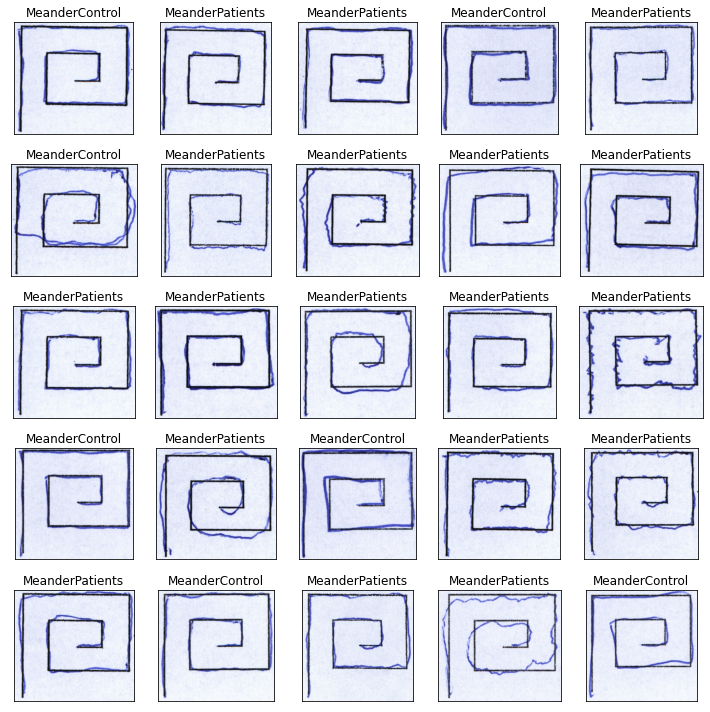

In [27]:
# общая картинка
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data["JPG"][i]))
    ax.set_title(data["CATEGORY"][i])
plt.tight_layout()
plt.show()

### Тренировка и тестирование на датасете

In [29]:
# трансформация
path = []
for i in range(0, 368):
    path.append(np.array(cv2.imread(data["JPG"][i])).astype("float32").mean()/255)

train = pd.concat([pd.Series(path, name="JPG"), pd.Series(LabelEncoder().fit_transform(data["CATEGORY"]), name="CATEGORY")], axis=1)

# тренировка и тестирование
xTrain, xTest, yTrain, yTest = train_test_split(train[["JPG"]], train["CATEGORY"], test_size=0.3)
models = [LogisticRegression(solver="liblinear").fit(xTrain, yTrain),
           GaussianNB().fit(xTrain, yTrain),
           KNeighborsClassifier().fit(xTrain, yTrain),
           DecisionTreeClassifier().fit(xTrain, yTrain),
           RandomForestClassifier(verbose=False).fit(xTrain, yTrain),
           GradientBoostingClassifier(verbose=False).fit(xTrain, yTrain),
           XGBClassifier().fit(xTrain, yTrain),
           LGBMClassifier().fit(xTrain, yTrain),
           CatBoostClassifier(verbose=False).fit(xTrain, yTrain)]
table_acc = pd.DataFrame(columns=['model','accuracy','sensitivity','specificity'])
i = 0
for model in models:
    predict = model.predict(xTest)
    cm = confusion_matrix(yTest, predict).ravel()
    tn, fp, fn, tp = cm
    accuracy = (tp + tn) / float(cm.sum())
    sensitivity = tp / float(tp + fn)
    specificity = tn / float(tn + fp)
    #table_acc.loc[i] = [model.__class__.__name__, accuracy_score(yTest, predict)]
    table_acc.loc[i] = [model.__class__.__name__, accuracy, sensitivity, specificity]
    i += 1
table_acc

[22:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,accuracy,sensitivity,specificity
0,LogisticRegression,0.792793,1.000000,0.000000
1,GaussianNB,0.792793,1.000000,0.000000
2,KNeighborsClassifier,0.756757,0.954545,0.000000
3,DecisionTreeClassifier,0.693694,0.829545,0.173913
4,RandomForestClassifier,0.693694,0.829545,0.173913
5,GradientBoostingClassifier,0.711712,0.886364,0.043478
6,XGBClassifier,0.720721,0.886364,0.086957
7,LGBMClassifier,0.792793,1.000000,0.000000
8,CatBoostClassifier,0.792793,1.000000,0.000000
